<a href="https://colab.research.google.com/github/shengy90/MSc-Project/blob/master/Data_Exploration_28Jun2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Authenticate with BigQuery ☁️**

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
%%bigquery --project machine-learning-msc df
SELECT 
  COUNT(*) as total_rows
FROM `machine-learning-msc.low_carbon_london.household_consumption_stats`

In [3]:
df

,total_rows
0,167932474


### **Importing Libraries⏬**

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Exploring Dataset 🔭**

In [5]:
%%bigquery --project machine-learning-msc lclids
SELECT 
acorn_grouped,
REPLACE(acorn, "ACORN-","") AS acorn,
stdortou,
lcl_id,
MIN(ts) AS datetime_min,
MAX(ts) AS datetime_max,
MIN(kwhh) AS kwhh_min,
MAX(kwhh) AS kwhh_max
FROM `machine-learning-msc.low_carbon_london.household_consumption_stats` 
GROUP BY 1,2,3,4
ORDER BY 1,2,3,4

**Household Types 🏠**

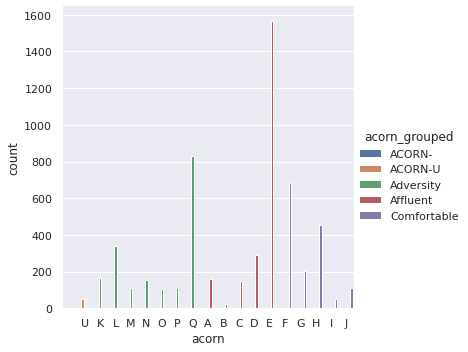

In [6]:
sns.catplot(x="acorn", kind="count", hue="acorn_grouped", data=lclids);

**Tariff Types ⚡️**

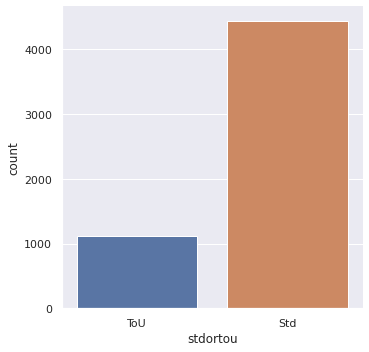

In [7]:
sns.catplot(x="stdortou", kind="count", data=lclids);

**Sampling Load Profiles 📊**


In [8]:
%%bigquery --project machine-learning-msc df_0
SELECT 
*
FROM `machine-learning-msc.low_carbon_london.household_consumption_stats` 
WHERE sample = 0

In [9]:
df_0.head(2)

,lcl_id,ts,year,month,day,hour,minute,stdortou,tariff_type,tariff,kwhh,acorn,acorn_grouped,sample
0,MAC000260,2012-10-11 02:30:00+00:00,2012-01-01,2012-10-01,2012-10-11,2,30,Std,Normal,14.228,0.017,G,Comfortable,0
1,MAC000260,2012-09-21 16:00:00+00:00,2012-01-01,2012-09-01,2012-09-21,16,0,Std,Normal,14.228,0.018,G,Comfortable,0


In [10]:
df_0.dtypes

lcl_id                        object
ts               datetime64[ns, UTC]
year                          object
month                         object
day                           object
hour                           int64
minute                         int64
stdortou                      object
tariff_type                   object
tariff                       float64
kwhh                         float64
acorn                         object
acorn_grouped                 object
sample                         int64
dtype: object

In [11]:
def plot_timeseries(df, x_dim, y_dim, x, y, hue, title):
    fig, ax = plt.subplots(figsize=(x_dim, y_dim))
    sns.lineplot(x=x, y=y, hue=hue, data=df).set_title(title)

def aggregate_timeseries(df, time:str, dim:str, agg:str, filters:str=None):
    """
    Params:
        @time (str): year, month or day
        @dim (str): acorn or acorn_grouped
        @agg (str): mean, max, min or sum
        @filteres (str) : WHERE clause, e.g. 'acorn_grouped' = 'Affluent' etc.
    """
    if filters != None:
        df = df.query(f"{filters}")

    if agg == 'mean':
        df_grouped = df.groupby([dim, time]).mean()
    elif agg == 'max':
        df_grouped = df.groupby([dim, time]).max()
    elif agg == 'min':
        df_grouped = df.groupby([dim, time]).min()
    elif agg == 'sum':
        df_grouped = df.groupby([dim,time]).sum()
    else:
        raise ValueError(f"{agg} is not one of ['mean', 'max', 'min', 'sum']")

    df_grouped.reset_index(inplace=True)
    plot_timeseries(df_grouped, 20, 5, time, 'kwhh', dim, f"{time} {agg} of {dim}")
    return df_grouped

,acorn_grouped,day,hour,minute,tariff,kwhh,sample
0,Adversity,2011-12-17,471,450,412.612,13.192,0
1,Adversity,2011-12-18,552,720,682.944,16.236,0
2,Adversity,2011-12-19,552,720,682.944,11.176,0
3,Adversity,2011-12-20,552,720,682.944,11.970,0
4,Adversity,2011-12-21,546,690,668.716,15.649,0
...,...,...,...,...,...,...,...
2434,Comfortable,2014-02-24,14352,18720,17756.544,280.409,0
2435,Comfortable,2014-02-25,14352,18720,17756.544,272.319,0
2436,Comfortable,2014-02-26,14352,18720,17756.544,249.037,0
2437,Comfortable,2014-02-27,14352,18720,17756.544,256.438,0


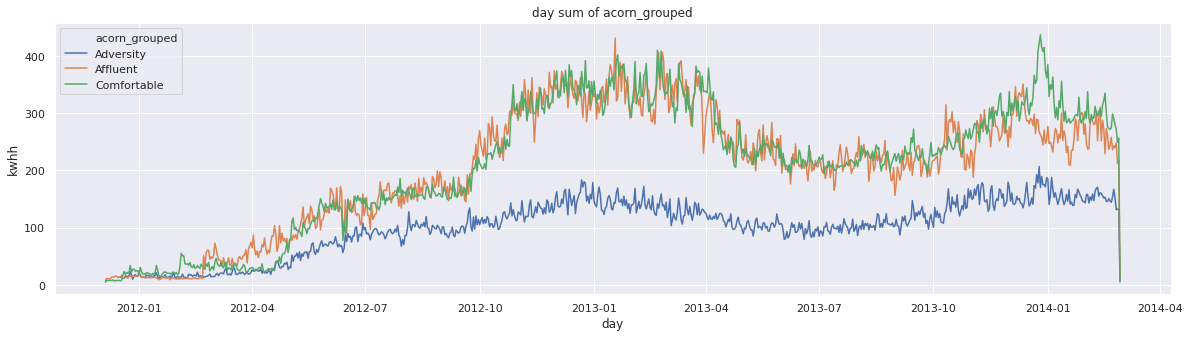

In [12]:
aggregate_timeseries(df=df_0, time='day', dim = 'acorn_grouped', agg='sum')

,acorn_grouped,day,hour,minute,tariff,kwhh,sample
0,Adversity,2011-12-17,16.241379,15.517241,14.228,0.454897,0.0
1,Adversity,2011-12-18,11.500000,15.000000,14.228,0.338250,0.0
2,Adversity,2011-12-19,11.500000,15.000000,14.228,0.232833,0.0
3,Adversity,2011-12-20,11.500000,15.000000,14.228,0.249375,0.0
4,Adversity,2011-12-21,11.617021,14.680851,14.228,0.332957,0.0
...,...,...,...,...,...,...,...
2434,Comfortable,2014-02-24,11.500000,15.000000,14.228,0.224687,0.0
2435,Comfortable,2014-02-25,11.500000,15.000000,14.228,0.218204,0.0
2436,Comfortable,2014-02-26,11.500000,15.000000,14.228,0.199549,0.0
2437,Comfortable,2014-02-27,11.500000,15.000000,14.228,0.205479,0.0


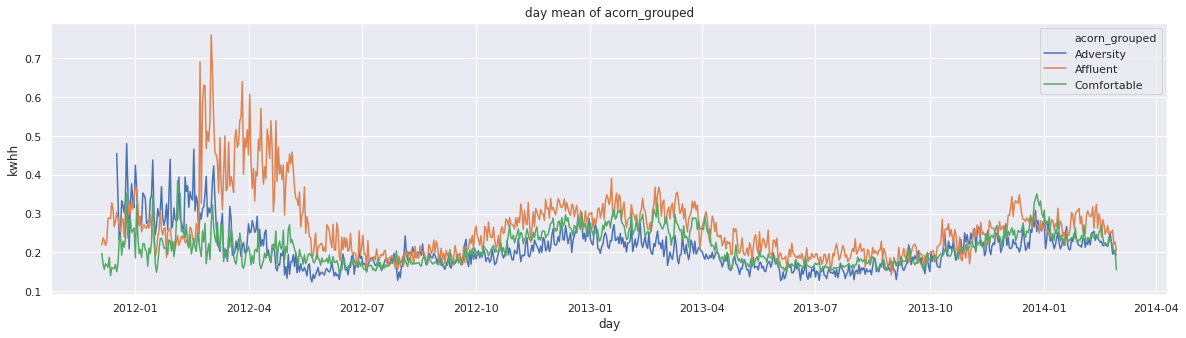

In [13]:
aggregate_timeseries(df=df_0, time='day', dim = 'acorn_grouped', agg='mean')

,acorn,day,hour,minute,tariff,kwhh,sample
0,B,2012-05-18,15.46875,15.0,14.228,0.349625,0.0
1,B,2012-05-19,11.50000,15.0,14.228,0.278396,0.0
2,B,2012-05-20,11.50000,15.0,14.228,0.204646,0.0
3,B,2012-05-21,11.50000,15.0,14.228,0.231667,0.0
4,B,2012-05-22,11.50000,15.0,14.228,0.117021,0.0
...,...,...,...,...,...,...,...
2796,E,2014-02-24,11.50000,15.0,14.228,0.247065,0.0
2797,E,2014-02-25,11.50000,15.0,14.228,0.261999,0.0
2798,E,2014-02-26,11.50000,15.0,14.228,0.215231,0.0
2799,E,2014-02-27,11.50000,15.0,14.228,0.213899,0.0


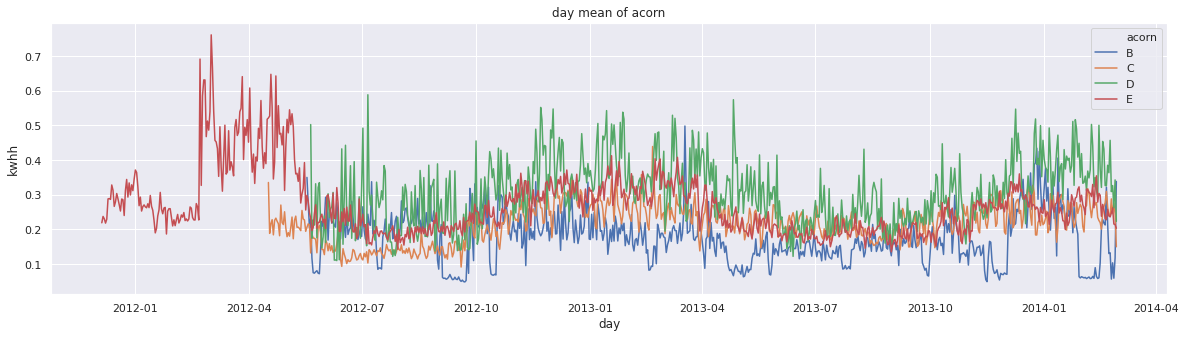

In [14]:
aggregate_timeseries(df=df_0, time='day', dim='acorn', agg='mean', filters="acorn_grouped=='Affluent'")

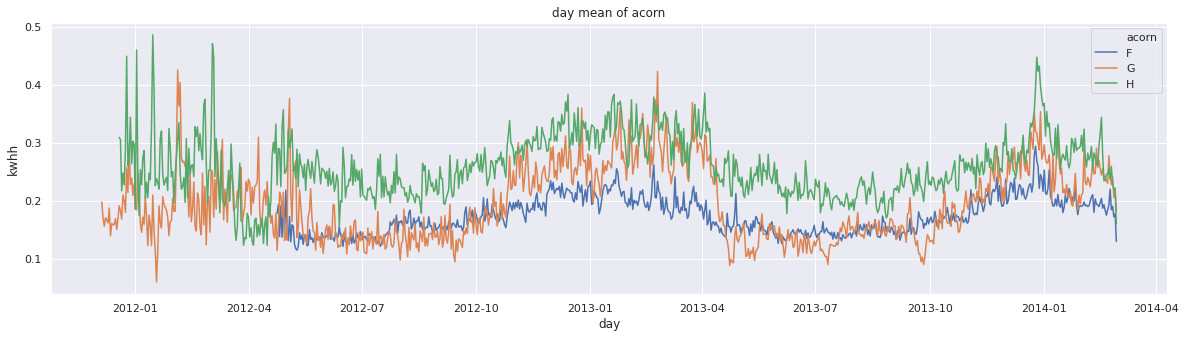

In [15]:
df_0_day_acorn_affluent = aggregate_timeseries(df=df_0, time='day', dim='acorn', agg='mean', filters="acorn_grouped=='Comfortable'")

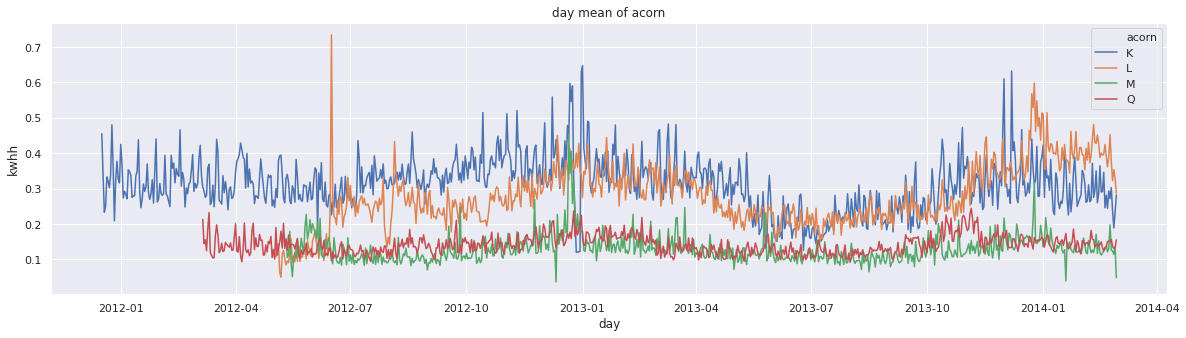

In [16]:
df_0_day_acorn_affluent = aggregate_timeseries(df=df_0, time='day', dim='acorn', agg='mean', filters="acorn_grouped=='Adversity'")

**Count number of records**

In [17]:
%%bigquery --project machine-learning-msc check_rows
SELECT 
lcl_id,
MIN(ts) AS first_record,
MAX(ts) AS last_record,
COUNT(kwhh) AS num_records,
FLOOR(COUNT(kwhh)/1000)*1000 AS num_records_rounded
FROM `machine-learning-msc.low_carbon_london.household_consumption_stats`
GROUP BY 1

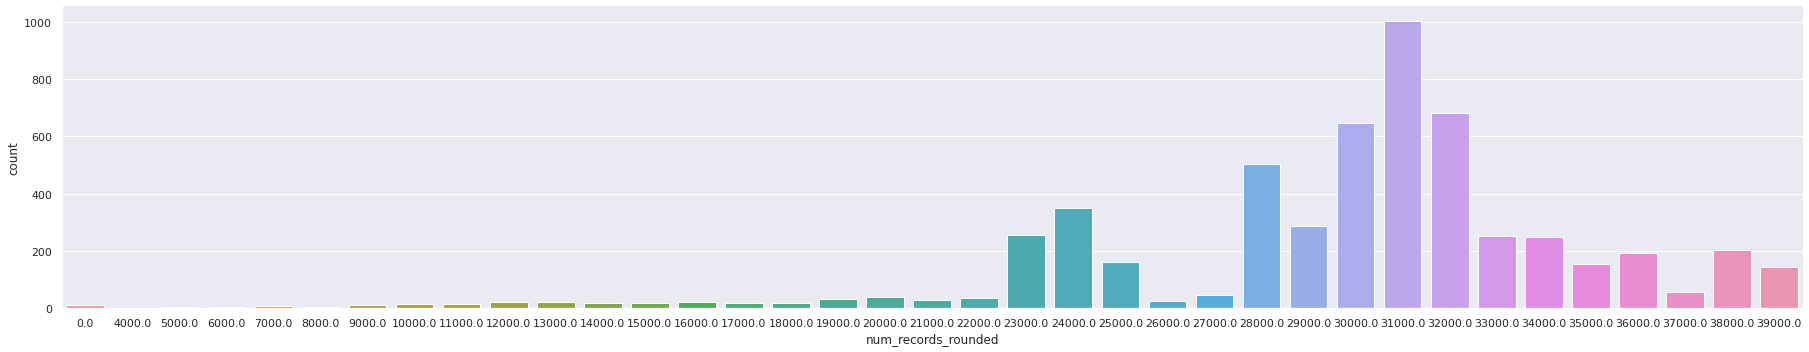

In [18]:
sns.catplot(x='num_records_rounded', data=check_rows, kind='count', height=5, aspect=5)

In [19]:
%%bigquery --project machine-learning-msc check_month
SELECT 
DISTINCT
lcl_id,
EXTRACT(YEAR FROM month)*100+EXTRACT(MONTH from month) AS yyyymm
FROM `machine-learning-msc.low_carbon_london.household_consumption_stats`

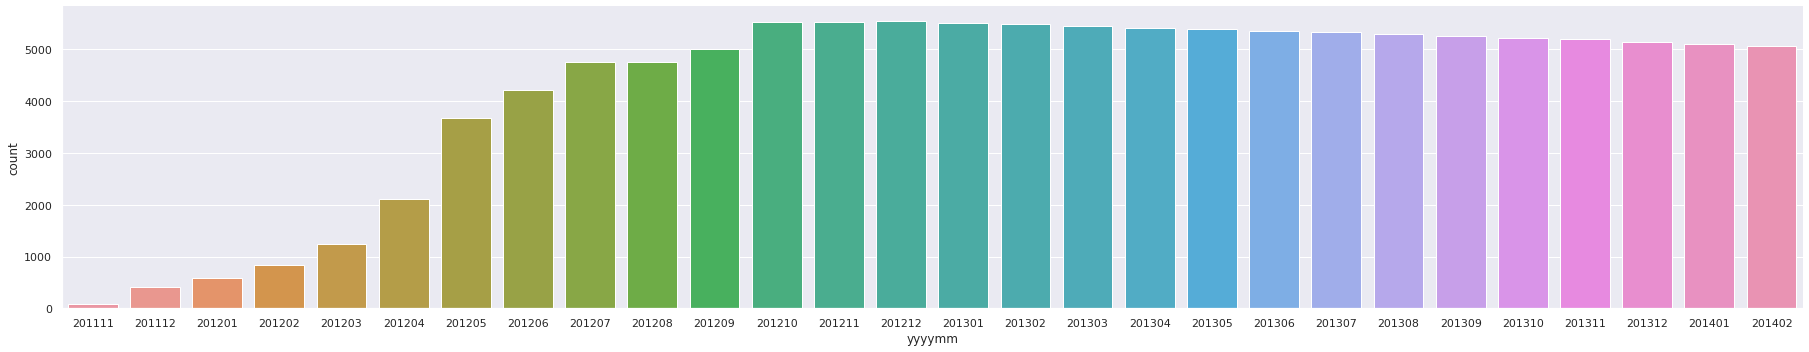

In [20]:
sns.catplot(x='yyyymm', data=check_month, kind='count', height=5, aspect=5)